🔬 INICIANDO ANÁLISIS EXPLORATORIO - SANTANDER MÉXICO
🚀 INICIANDO ANÁLISIS EXPLORATORIO...
✅ Conectado a MySQL exitosamente

📥 Cargando datos de transacciones...


C:\Users\kevin\AppData\Local\Temp\ipykernel_21832\2862962161.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ Datos cargados: 50,000 transacciones
   • Columnas disponibles: ['id', 'transaction_id', 'timestamp', 'monto', 'es_fraude', 'producto_cd', 'id_tarjeta', 'tipo_tarjeta', 'canal', 'producto', 'email_dominio', 'caracteristica_1', 'caracteristica_2', 'created_at']

📈 ESTADÍSTICAS BÁSICAS:
   • Tasa de fraude: 2.7140%
   • Transacciones fraudulentas: 1,357
   • Monto promedio: $128.12
   • Monto máximo: $4829.95
   • Monto mínimo: $0.29

🏦 ANÁLISIS POR CANAL SANTANDER:
                           total_transacciones  monto_promedio  monto_maximo  \
canal                                                                          
Santander Empresarial                     3354          187.83       1000.00   
Santander Inversión                       1464           56.86        700.00   
Santander SuperCuenta                     7450           72.54        500.00   
Tarjeta Crédito Santander                32798          149.98       4829.95   
Tarjeta Débito Santander                  4934   

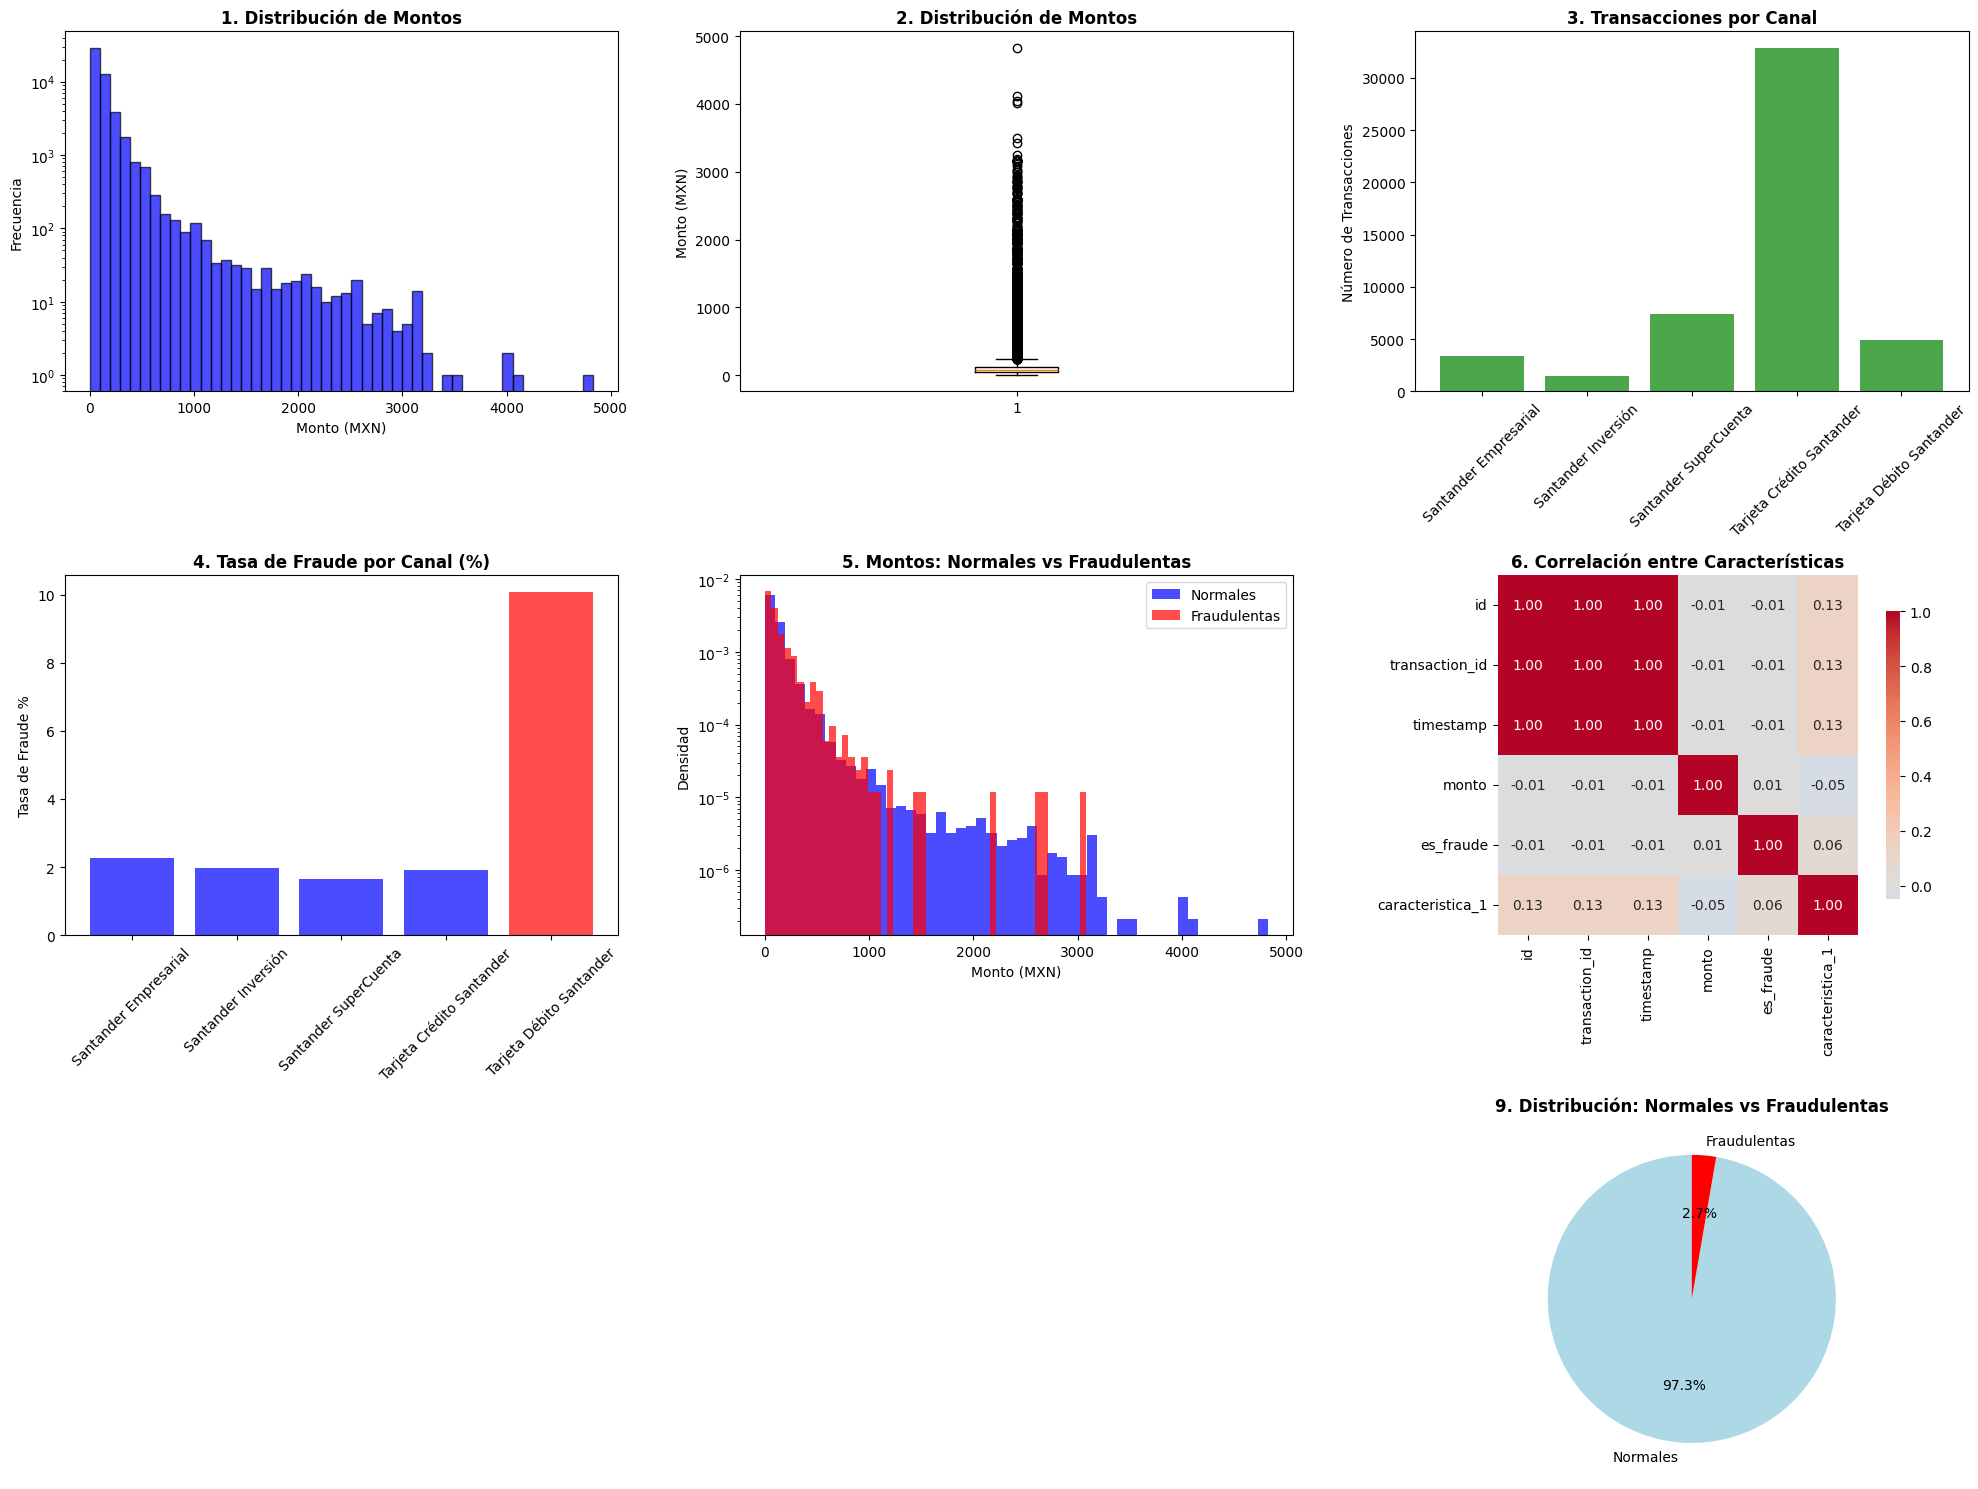

✅ 7 visualizaciones generadas y guardadas

🎯 RECOMENDACIONES PARA MODELO ML:
   • Características a usar: monto
   • Canal crítico: Tarjeta Débito Santander
   • Desbalance: 2.71% - NECESITA SMOTE

🎉 ANÁLISIS COMPLETADO EXITOSAMENTE!
📊 RESUMEN FINAL:
   • Transacciones analizadas: 50,000
   • Columnas disponibles: 14
   • Tasa de fraude: 2.7140%
   • Características numéricas: 7

🚀 PRÓXIMOS PASOS:
   1. Mañana: Preprocesamiento y limpieza de datos
   2. Miércoles: Entrenamiento del primer modelo ML
   3. Jueves: Evaluación y optimización
   4. Viernes: Integración con el sistema

💡 CONSEJO: Revisa el archivo 'analisis_exploratorio_santander.png'
   para entender visualmente tus datos


In [2]:
# analisis_exploratorio_santander_FINAL.py
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

print("🔬 INICIANDO ANÁLISIS EXPLORATORIO - SANTANDER MÉXICO")
print("=" * 60)

def analisis_completo_santander():
    """Análisis exploratorio completo de los datos Santander"""
    
    # 1. CONEXIÓN A LA BASE DE DATOS
    try:
        conn = mysql.connector.connect(
            host='localhost', 
            database='santander_sistema',
            user='root', 
            password='root', 
            port=3306
        )
        print("✅ Conectado a MySQL exitosamente")
        
        # 2. CARGAR DIRECTAMENTE LOS DATOS SIN JOINS
        print("\n📥 Cargando datos de transacciones...")
        
        # Consulta simple - solo los datos básicos
        query = "SELECT * FROM transacciones_reales LIMIT 50000"
        
        df = pd.read_sql(query, conn)
        print(f"✅ Datos cargados: {len(df):,} transacciones")
        print(f"   • Columnas disponibles: {list(df.columns)}")
        
        # 3. ANÁLISIS BÁSICO
        print("\n📈 ESTADÍSTICAS BÁSICAS:")
        
        # Verificar columnas clave
        if 'es_fraude' in df.columns:
            tasa_fraude = df['es_fraude'].mean()
            print(f"   • Tasa de fraude: {(tasa_fraude * 100):.4f}%")
            print(f"   • Transacciones fraudulentas: {df['es_fraude'].sum():,}")
        else:
            print("   • Columna 'es_fraude' no encontrada")
        
        if 'monto' in df.columns:
            print(f"   • Monto promedio: ${df['monto'].mean():.2f}")
            print(f"   • Monto máximo: ${df['monto'].max():.2f}")
            print(f"   • Monto mínimo: ${df['monto'].min():.2f}")
        else:
            print("   • Columna 'monto' no encontrada")
        
        # 4. ANÁLISIS POR CANAL (si existe la columna)
        if 'canal' in df.columns:
            print(f"\n🏦 ANÁLISIS POR CANAL SANTANDER:")
            
            # Crear análisis personalizado
            analisis_canal = pd.DataFrame({
                'total_transacciones': df.groupby('canal').size(),
                'monto_promedio': df.groupby('canal')['monto'].mean().round(2),
                'monto_maximo': df.groupby('canal')['monto'].max().round(2)
            })
            
            # Agregar fraudes si existe la columna
            if 'es_fraude' in df.columns:
                analisis_canal['total_fraudes'] = df.groupby('canal')['es_fraude'].sum()
                analisis_canal['tasa_fraude_pct'] = (df.groupby('canal')['es_fraude'].mean() * 100).round(2)
            
            print(analisis_canal)
            
            # Identificar canal más crítico
            if 'tasa_fraude_pct' in analisis_canal.columns:
                canal_critico = analisis_canal['tasa_fraude_pct'].idxmax()
                print(f"\n🚨 CANAL MÁS CRÍTICO: {canal_critico}")
                print(f"   • Tasa de fraude: {analisis_canal.loc[canal_critico, 'tasa_fraude_pct']}%")
                print(f"   • Total fraudes: {analisis_canal.loc[canal_critico, 'total_fraudes']:.0f}")
        else:
            print(f"\n🏦 No se encontró columna 'canal'")
            analisis_canal = None
        
        # 5. ANÁLISIS DE CARACTERÍSTICAS DISPONIBLES
        print(f"\n🔍 CARACTERÍSTICAS DISPONIBLES PARA ML:")
        
        # Mostrar todas las columnas
        print(f"   • Todas las columnas: {list(df.columns)}")
        
        # Columnas numéricas
        columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
        print(f"   • Columnas numéricas: {len(columnas_numericas)}")
        print(f"   • Lista: {columnas_numericas}")
        
        # Características C1-C14
        columnas_c = [col for col in columnas_numericas if col.startswith('c') and col[1:].isdigit()]
        if columnas_c:
            print(f"   • Características C1-C14: {len(columnas_c)} disponibles")
            print(f"   • Lista: {columnas_c}")
        
        # 6. INFORMACIÓN SOBRE VALORES NULOS
        print(f"\n🔎 INFORMACIÓN DE VALORES NULOS:")
        nulos = df.isnull().sum()
        columnas_con_nulos = nulos[nulos > 0]
        if len(columnas_con_nulos) > 0:
            for col, count in columnas_con_nulos.items():
                print(f"   • {col}: {count} valores nulos ({(count/len(df)*100):.2f}%)")
        else:
            print(f"   • No hay valores nulos")
        
        # 7. VISUALIZACIONES CLAVE
        print(f"\n📊 GENERANDO VISUALIZACIONES...")
        generar_visualizaciones(df, analisis_canal)
        
        # 8. RECOMENDACIONES PARA MODELO ML
        print(f"\n🎯 RECOMENDACIONES PARA MODELO ML:")
        
        # Seleccionar mejores características
        caracteristicas_recomendadas = []
        if 'monto' in df.columns:
            caracteristicas_recomendadas.append('monto')
        if columnas_c:
            caracteristicas_recomendadas.extend(columnas_c[:5])  # Máximo 6 características
        
        print(f"   • Características a usar: {', '.join(caracteristicas_recomendadas)}")
        
        if analisis_canal is not None and 'tasa_fraude_pct' in analisis_canal.columns:
            canal_critico = analisis_canal['tasa_fraude_pct'].idxmax()
            print(f"   • Canal crítico: {canal_critico}")
        
        if 'es_fraude' in df.columns:
            desbalance = (df['es_fraude'].mean() * 100)
            print(f"   • Desbalance: {desbalance:.2f}% - {'NECESITA SMOTE' if desbalance < 5 else 'aceptable'}")
        
        conn.close()
        return df, analisis_canal
        
    except Exception as e:
        print(f"❌ Error en el análisis: {e}")
        import traceback
        traceback.print_exc()
        return None, None

def generar_visualizaciones(df, analisis_canal):
    """Generar visualizaciones para entender los datos"""
    
    plt.figure(figsize=(20, 15))
    
    plots_generados = 0
    
    # 1. Distribución de montos (SIEMPRE disponible)
    try:
        plt.subplot(3, 3, 1)
        plt.hist(df['monto'], bins=50, alpha=0.7, color='blue', edgecolor='black')
        plt.title('1. Distribución de Montos', fontsize=12, fontweight='bold')
        plt.xlabel('Monto (MXN)')
        plt.ylabel('Frecuencia')
        plt.yscale('log')
        plots_generados += 1
    except Exception as e:
        print(f"   ⚠️  No se pudo generar gráfica 1: {e}")
    
    # 2. Boxplot de montos
    try:
        plt.subplot(3, 3, 2)
        plt.boxplot(df['monto'])
        plt.title('2. Distribución de Montos', fontsize=12, fontweight='bold')
        plt.ylabel('Monto (MXN)')
        plots_generados += 1
    except Exception as e:
        print(f"   ⚠️  No se pudo generar gráfica 2: {e}")
    
    # 3. Distribución por canal (si existe)
    if analisis_canal is not None:
        try:
            plt.subplot(3, 3, 3)
            counts = analisis_canal['total_transacciones']
            plt.bar(range(len(counts)), counts.values, alpha=0.7, color='green')
            plt.title('3. Transacciones por Canal', fontsize=12, fontweight='bold')
            plt.xticks(range(len(counts)), counts.index, rotation=45)
            plt.ylabel('Número de Transacciones')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 3: {e}")
    
    # 4. Tasa de fraude por canal (si existe)
    if analisis_canal is not None and 'tasa_fraude_pct' in analisis_canal.columns:
        try:
            plt.subplot(3, 3, 4)
            tasas = analisis_canal['tasa_fraude_pct']
            colores = ['red' if tasa > tasas.mean() else 'blue' for tasa in tasas]
            plt.bar(range(len(tasas)), tasas.values, color=colores, alpha=0.7)
            plt.title('4. Tasa de Fraude por Canal (%)', fontsize=12, fontweight='bold')
            plt.xticks(range(len(tasas)), tasas.index, rotation=45)
            plt.ylabel('Tasa de Fraude %')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 4: {e}")
    
    # 5. Distribución de fraudes vs normales (si existe es_fraude)
    if 'es_fraude' in df.columns:
        try:
            plt.subplot(3, 3, 5)
            monto_normal = df[df['es_fraude'] == 0]['monto']
            monto_fraude = df[df['es_fraude'] == 1]['monto']
            
            plt.hist(monto_normal, bins=50, alpha=0.7, label='Normales', color='blue', density=True)
            plt.hist(monto_fraude, bins=50, alpha=0.7, label='Fraudulentas', color='red', density=True)
            plt.title('5. Montos: Normales vs Fraudulentas', fontsize=12, fontweight='bold')
            plt.xlabel('Monto (MXN)')
            plt.ylabel('Densidad')
            plt.legend()
            plt.yscale('log')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 5: {e}")
    
    # 6. Correlación entre características numéricas
    try:
        plt.subplot(3, 3, 6)
        columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
        # Tomar máximo 6 columnas para que sea legible
        columnas_correlacion = columnas_numericas[:6]
        if len(columnas_correlacion) > 1:
            correlacion = df[columnas_correlacion].corr()
            sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
                       square=True, cbar_kws={"shrink": .8})
            plt.title('6. Correlación entre Características', fontsize=12, fontweight='bold')
            plots_generados += 1
    except Exception as e:
        print(f"   ⚠️  No se pudo generar gráfica 6: {e}")
    
    # 7. Distribución de una característica C (si existe)
    columnas_c = [col for col in df.columns if col.startswith('c') and col[1:].isdigit()]
    if columnas_c:
        try:
            plt.subplot(3, 3, 7)
            plt.hist(df[columnas_c[0]].dropna(), bins=50, alpha=0.7, color='purple')
            plt.title(f'7. Distribución de {columnas_c[0]}', fontsize=12, fontweight='bold')
            plt.xlabel(columnas_c[0])
            plt.ylabel('Frecuencia')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 7: {e}")
    
    # 8. Scatter plot: monto vs característica C (si existe)
    if columnas_c and 'monto' in df.columns:
        try:
            plt.subplot(3, 3, 8)
            plt.scatter(df[columnas_c[0]], df['monto'], alpha=0.5, s=1)
            plt.title(f'8. {columnas_c[0]} vs Monto', fontsize=12, fontweight='bold')
            plt.xlabel(columnas_c[0])
            plt.ylabel('Monto (MXN)')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 8: {e}")
    
    # 9. Pie chart de distribución de fraudes (si existe)
    if 'es_fraude' in df.columns:
        try:
            plt.subplot(3, 3, 9)
            counts = df['es_fraude'].value_counts()
            labels = ['Normales', 'Fraudulentas']
            colors = ['lightblue', 'red']
            plt.pie(counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            plt.title('9. Distribución: Normales vs Fraudulentas', fontsize=12, fontweight='bold')
            plots_generados += 1
        except Exception as e:
            print(f"   ⚠️  No se pudo generar gráfica 9: {e}")
    
    if plots_generados > 0:
        plt.tight_layout()
        plt.savefig('analisis_exploratorio_santander.png', dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ {plots_generados} visualizaciones generadas y guardadas")
    else:
        print("❌ No se pudieron generar visualizaciones")

# EJECUTAR ANÁLISIS COMPLETO
if __name__ == "__main__":
    print("🚀 INICIANDO ANÁLISIS EXPLORATORIO...")
    df, analisis_canal = analisis_completo_santander()
    
    if df is not None:
        print(f"\n🎉 ANÁLISIS COMPLETADO EXITOSAMENTE!")
        print(f"📊 RESUMEN FINAL:")
        print(f"   • Transacciones analizadas: {len(df):,}")
        print(f"   • Columnas disponibles: {len(df.columns)}")
        
        if 'es_fraude' in df.columns:
            print(f"   • Tasa de fraude: {(df['es_fraude'].mean() * 100):.4f}%")
        
        print(f"   • Características numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
        
        print(f"\n🚀 PRÓXIMOS PASOS:")
        print(f"   1. Mañana: Preprocesamiento y limpieza de datos")
        print(f"   2. Miércoles: Entrenamiento del primer modelo ML")
        print(f"   3. Jueves: Evaluación y optimización")
        print(f"   4. Viernes: Integración con el sistema")
        
        print(f"\n💡 CONSEJO: Revisa el archivo 'analisis_exploratorio_santander.png'")
        print(f"   para entender visualmente tus datos")
    else:
        print(f"\n❌ No se pudo completar el análisis.")

In [3]:
# preprocesamiento_ml_santander.py
import pandas as pd
import numpy as np
import mysql.connector
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("🧹 INICIANDO PREPROCESAMIENTO - SANTANDER MÉXICO")
print("=" * 50)

def cargar_datos_para_ml():
    """Cargar datos desde MySQL para ML"""
    
    print("📥 Cargando datos para machine learning...")
    
    try:
        conn = mysql.connector.connect(
            host='localhost', database='santander_sistema',
            user='root', password='root', port=3306
        )
        
        # Cargar datos (usamos la misma consulta simple)
        query = "SELECT * FROM transacciones_reales LIMIT 50000"
        df = pd.read_sql(query, conn)
        conn.close()
        
        print(f"✅ Datos cargados: {len(df):,} transacciones")
        return df
        
    except Exception as e:
        print(f"❌ Error cargando datos: {e}")
        return None

def preprocesar_datos_santander(df):
    """Limpiar y preparar datos para modelo ML"""
    
    print("\n🧹 INICIANDO PREPROCESAMIENTO...")
    
    # 1. HACER COPIA Y VERIFICAR COLUMNAS CLAVE
    df_clean = df.copy()
    
    # Columnas que esperamos (basado en tu análisis)
    columnas_esperadas = ['monto', 'es_fraude', 'canal']
    columnas_c = [col for col in df.columns if col.startswith('c') and col[1:].isdigit()]
    
    print(f"   • Columnas disponibles: {list(df_clean.columns)}")
    print(f"   • Características C: {columnas_c}")
    
    # 2. MANEJAR VALORES NULOS
    print("\n🔍 Manejo de valores nulos...")
    nulos_antes = df_clean.isnull().sum().sum()
    
    # Para características numéricas
    columnas_numericas = df_clean.select_dtypes(include=[np.number]).columns
    imputer_numerico = SimpleImputer(strategy='median')
    df_clean[columnas_numericas] = imputer_numerico.fit_transform(df_clean[columnas_numericas])
    
    # Para características categóricas
    columnas_categoricas = df_clean.select_dtypes(include=['object']).columns
    for col in columnas_categoricas:
        df_clean[col].fillna('DESCONOCIDO', inplace=True)
    
    nulos_despues = df_clean.isnull().sum().sum()
    print(f"   • Valores nulos antes: {nulos_antes}")
    print(f"   • Valores nulos después: {nulos_despues}")
    
    # 3. CODIFICAR VARIABLES CATEGÓRICAS
    print("\n🔤 Codificando variables categóricas...")
    label_encoders = {}
    
    if 'canal' in df_clean.columns:
        le_canal = LabelEncoder()
        df_clean['canal_encoded'] = le_canal.fit_transform(df_clean['canal'])
        label_encoders['canal'] = le_canal
        print(f"   • Canales codificados: {dict(zip(le_canal.classes_, range(len(le_canal.classes_))))}")
    
    # 4. CREAR CARACTERÍSTICAS DERIVADAS
    print("\n🎯 Creando características derivadas...")
    
    # Características basadas en monto
    df_clean['monto_log'] = np.log1p(df_clean['monto'])
    df_clean['monto_alto'] = (df_clean['monto'] > df_clean['monto'].quantile(0.95)).astype(int)
    
    # Si existe timestamp, crear características temporales
    if 'timestamp' in df_clean.columns:
        df_clean['hora_dia'] = (df_clean['timestamp'] % 86400) / 3600
        df_clean['es_noche'] = ((df_clean['hora_dia'] >= 22) | (df_clean['hora_dia'] <= 6)).astype(int)
        print(f"   • Características temporales creadas")
    
    # 5. SELECCIONAR CARACTERÍSTICAS FINALES
    print("\n📊 Seleccionando características para el modelo...")
    
    # Características base
    caracteristicas_finales = ['monto', 'monto_log', 'monto_alto']
    
    # Agregar características C (hasta 5 para empezar)
    if columnas_c:
        caracteristicas_finales.extend(columnas_c[:5])
    
    # Agregar características codificadas
    if 'canal_encoded' in df_clean.columns:
        caracteristicas_finales.append('canal_encoded')
    
    # Agregar características temporales si existen
    if 'es_noche' in df_clean.columns:
        caracteristicas_finales.append('es_noche')
    
    print(f"   • Características seleccionadas: {caracteristicas_finales}")
    
    # 6. VERIFICAR QUE TENEMOS LA VARIABLE OBJETIVO
    if 'es_fraude' not in df_clean.columns:
        print("❌ ERROR: No se encuentra la columna 'es_fraude'")
        return None, None, None, None
    
    # Crear datasets finales
    X = df_clean[caracteristicas_finales]
    y = df_clean['es_fraude']
    
    print(f"   • Dataset final: {X.shape[0]} muestras, {X.shape[1]} características")
    print(f"   • Distribución de clases: {y.value_counts().to_dict()}")
    print(f"   • Tasa de fraude: {(y.mean() * 100):.2f}%")
    
    return X, y, df_clean, label_encoders

def normalizar_caracteristicas(X_train, X_test):
    """Normalizar características para mejor performance del modelo"""
    
    print("\n📏 Normalizando características...")
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("   ✅ Características normalizadas")
    return X_train_scaled, X_test_scaled, scaler

# EJECUTAR PREPROCESAMIENTO COMPLETO
if __name__ == "__main__":
    # 1. Cargar datos
    df = cargar_datos_para_ml()
    if df is None:
        exit()
    
    # 2. Preprocesar
    X, y, df_clean, encoders = preprocesar_datos_santander(df)
    
    if X is not None:
        print(f"\n🎉 PREPROCESAMIENTO COMPLETADO EXITOSAMENTE!")
        print(f"📊 RESUMEN:")
        print(f"   • Características: {X.shape[1]}")
        print(f"   • Muestras: {X.shape[0]}")
        print(f"   • Fraudulentas: {y.sum()} ({(y.mean()*100):.2f}%)")
        
        # Guardar dataset preprocesado para el siguiente paso
        datos_preprocesados = {
            'X': X,
            'y': y, 
            'df_clean': df_clean,
            'encoders': encoders
        }
        
        import pickle
        with open('datos_preprocesados.pkl', 'wb') as f:
            pickle.dump(datos_preprocesados, f)
        
        print(f"💾 Datos guardados en 'datos_preprocesados.pkl'")
        
    else:
        print("❌ Error en el preprocesamiento")

🧹 INICIANDO PREPROCESAMIENTO - SANTANDER MÉXICO
📥 Cargando datos para machine learning...
✅ Datos cargados: 50,000 transacciones

🧹 INICIANDO PREPROCESAMIENTO...
   • Columnas disponibles: ['id', 'transaction_id', 'timestamp', 'monto', 'es_fraude', 'producto_cd', 'id_tarjeta', 'tipo_tarjeta', 'canal', 'producto', 'email_dominio', 'caracteristica_1', 'caracteristica_2', 'created_at']
   • Características C: []

🔍 Manejo de valores nulos...
   • Valores nulos antes: 0
   • Valores nulos después: 0

🔤 Codificando variables categóricas...
   • Canales codificados: {'Santander Empresarial': 0, 'Santander Inversión': 1, 'Santander SuperCuenta': 2, 'Tarjeta Crédito Santander': 3, 'Tarjeta Débito Santander': 4}

🎯 Creando características derivadas...
   • Características temporales creadas

📊 Seleccionando características para el modelo...
   • Características seleccionadas: ['monto', 'monto_log', 'monto_alto', 'canal_encoded', 'es_noche']
   • Dataset final: 50000 muestras, 5 características


In [11]:
# modelo_basico_santander_corregido.py
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, precision_score, recall_score, f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

print("🤖 INICIANDO ENTRENAMIENTO DE MODELO - SANTANDER MÉXICO")
print("=" * 50)

def manejar_desbalance(X, y):
    """Manejar el desbalance de clases usando técnicas básicas"""
    
    print("⚖️  MANEJANDO DESBALANCE DE CLASES...")
    
    print(f"   • Distribución ANTES del balanceo:")
    print(f"     - Clase 0 (Normal): {sum(y == 0):,} ({(sum(y == 0)/len(y)*100):.2f}%)")
    print(f"     - Clase 1 (Fraude): {sum(y == 1):,} ({(sum(y == 1)/len(y)*100):.2f}%)")
    
    # Separar las clases
    X_normal = X[y == 0]
    X_fraude = X[y == 1]
    y_normal = y[y == 0]
    y_fraude = y[y == 1]
    
    # Sobremuestrear la clase minoritaria (fraude)
    n_fraudes_deseado = int(len(X_normal) * 0.25)  # 25% de fraudes
    
    if len(X_fraude) < n_fraudes_deseado:
        # Sobremuestrear fraudes
        X_fraude_oversampled, y_fraude_oversampled = resample(
            X_fraude, y_fraude,
            replace=True,
            n_samples=n_fraudes_deseado,
            random_state=42
        )
        
        # Combinar datos
        X_balanced = np.vstack((X_normal, X_fraude_oversampled))
        y_balanced = np.hstack((y_normal, y_fraude_oversampled))
        
        tecnica = "Oversampling (25% fraudes)"
    else:
        # Si ya hay suficientes fraudes, usar los datos originales
        X_balanced = X
        y_balanced = y
        tecnica = "Datos originales"
    
    print(f"   ✅ Técnica seleccionada: {tecnica}")
    print(f"   • Distribución DESPUÉS del balanceo:")
    print(f"     - Clase 0 (Normal): {sum(y_balanced == 0):,}")
    print(f"     - Clase 1 (Fraude): {sum(y_balanced == 1):,}")
    print(f"     - Nuevo ratio: {(sum(y_balanced == 1)/len(y_balanced)*100):.2f}%")
    
    return X_balanced, y_balanced

def calcular_metricas_seguras(y_true, y_pred, y_pred_proba):
    """Calcular métricas de forma segura cuando hay clases ausentes"""
    
    # Métricas básicas
    auc = roc_auc_score(y_true, y_pred_proba)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Para precision, recall y f1, manejamos el caso donde no hay positivos
    try:
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
    except:
        precision = 0.0
        recall = 0.0
        f1 = 0.0
    
    return {
        'auc': auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

def entrenar_modelos_comparacion(X_train, y_train, X_test, y_test):
    """Entrenar y comparar múltiples modelos"""
    
    print("\n🤖 ENTRENANDO Y COMPARANDO MODELOS...")
    
    # Verificar distribución en test
    print(f"   • Distribución en TEST:")
    print(f"     - Clase 0 (Normal): {sum(y_test == 0):,}")
    print(f"     - Clase 1 (Fraude): {sum(y_test == 1):,}")
    
    # Modelos a probar
    modelos = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100, 
            random_state=42,
            max_depth=10,
            class_weight='balanced'
        ),
        'Logistic Regression': LogisticRegression(
            random_state=42,
            class_weight='balanced',
            max_iter=1000
        ),
        'SVM': SVC(
            probability=True,
            random_state=42,
            class_weight='balanced'
        )
    }
    
    resultados = {}
    
    for nombre, modelo in modelos.items():
        print(f"\n🎯 Entrenando {nombre}...")
        
        try:
            # Entrenar modelo
            modelo.fit(X_train, y_train)
            
            # Predecir
            y_pred = modelo.predict(X_test)
            y_pred_proba = modelo.predict_proba(X_test)[:, 1]
            
            # Calcular métricas de forma segura
            metricas = calcular_metricas_seguras(y_test, y_pred, y_pred_proba)
            
            # Guardar resultados
            resultados[nombre] = {
                'modelo': modelo,
                'auc': metricas['auc'],
                'precision': metricas['precision'],
                'recall': metricas['recall'], 
                'f1': metricas['f1'],
                'accuracy': metricas['accuracy']
            }
            
            print(f"   ✅ AUC: {metricas['auc']:.4f}")
            print(f"   ✅ Precision: {metricas['precision']:.4f}")
            print(f"   ✅ Recall: {metricas['recall']:.4f}")
            print(f"   ✅ F1-Score: {metricas['f1']:.4f}")
            
        except Exception as e:
            print(f"   ❌ Error entrenando {nombre}: {e}")
            continue
    
    return resultados

def seleccionar_mejor_modelo(resultados):
    """Seleccionar el mejor modelo basado en múltiples métricas"""
    
    print("\n🏆 SELECCIONANDO MEJOR MODELO...")
    
    if not resultados:
        print("   ❌ No hay modelos exitosos para comparar")
        return None, None
    
    # Calcular score compuesto (50% AUC, 25% Recall, 25% F1)
    for nombre, metrics in resultados.items():
        score_compuesto = (
            0.5 * metrics['auc'] +      # AUC es más importante
            0.25 * metrics['recall'] +  # Recall importante para detectar fraudes
            0.25 * metrics['f1']        # F1 balance entre precision y recall
        )
        resultados[nombre]['score_compuesto'] = score_compuesto
    
    # Encontrar mejor modelo
    mejor_modelo_nombre = max(resultados.keys(), key=lambda x: resultados[x]['score_compuesto'])
    mejor_modelo = resultados[mejor_modelo_nombre]
    
    print(f"   🥇 MEJOR MODELO: {mejor_modelo_nombre}")
    print(f"   📊 Métricas:")
    print(f"     • AUC: {mejor_modelo['auc']:.4f}")
    print(f"     • Precision: {mejor_modelo['precision']:.4f}")
    print(f"     • Recall: {mejor_modelo['recall']:.4f}") 
    print(f"     • F1-Score: {mejor_modelo['f1']:.4f}")
    print(f"     • Score Compuesto: {mejor_modelo['score_compuesto']:.4f}")
    
    return mejor_modelo_nombre, mejor_modelo

def evaluar_modelo_final(modelo, X_test, y_test, nombre_modelo):
    """Evaluación detallada del modelo seleccionado"""
    
    print(f"\n📊 EVALUACIÓN DETALLADA - {nombre_modelo}")
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    
    # 1. Matriz de confusión
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Fraude'],
                yticklabels=['Normal', 'Fraude'])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    
    # 2. Curva ROC
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    
    # 3. Curva Precision-Recall
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    
    plt.tight_layout()
    plt.savefig('evaluacion_modelo_final.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. Métricas para negocio
    metricas = calcular_metricas_seguras(y_test, y_pred, y_pred_proba)
    
    print(f"\n💼 MÉTRICAS PARA SANTANDER:")
    print(f"   • AUC: {metricas['auc']:.4f}")
    print(f"   • Precisión (evitar falsas alarmas): {metricas['precision']:.4f}")
    print(f"   • Recall (detectar fraudes reales): {metricas['recall']:.4f}")
    print(f"   • F1-Score (balance general): {metricas['f1']:.4f}")
    
    # 5. Análisis de umbrales
    print(f"\n🔍 ANÁLISIS DE UMBRALES:")
    umbrales = [0.1, 0.3, 0.5, 0.7, 0.9]
    for umbral in umbrales:
        y_pred_umbral = (y_pred_proba >= umbral).astype(int)
        precision_umbral = precision_score(y_test, y_pred_umbral, zero_division=0)
        recall_umbral = recall_score(y_test, y_pred_umbral, zero_division=0)
        print(f"   • Umbral {umbral}: Precision={precision_umbral:.4f}, Recall={recall_umbral:.4f}")

# EJECUTAR PIPELINE COMPLETO
if __name__ == "__main__":
    # 1. Cargar datos preprocesados
    print("📥 Cargando datos preprocesados...")
    try:
        with open('datos_preprocesados.pkl', 'rb') as f:
            datos = pickle.load(f)
        
        X = datos['X']
        y = datos['y']
        print(f"✅ Datos cargados: {X.shape[0]} muestras, {X.shape[1]} características")
        
    except Exception as e:
        print(f"❌ Error cargando datos: {e}")
        print("💡 Ejecuta primero preprocesamiento_ml_santander.py")
        exit()
    
    # 2. Dividir en train/test
    print("\n📊 Dividiendo en train/test...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"   • Train: {X_train.shape[0]} muestras")
    print(f"   • Test: {X_test.shape[0]} muestras")
    print(f"   • Distribución en TEST - Normal: {sum(y_test == 0):,}, Fraude: {sum(y_test == 1):,}")
    
    # 3. Manejar desbalance (SOLO en train)
    X_train_balanced, y_train_balanced = manejar_desbalance(X_train, y_train)
    
    # 4. Entrenar y comparar modelos
    resultados = entrenar_modelos_comparacion(X_train_balanced, y_train_balanced, X_test, y_test)
    
    # 5. Seleccionar mejor modelo
    if resultados:
        mejor_nombre, mejor_modelo = seleccionar_mejor_modelo(resultados)
        
        # 6. Evaluación detallada
        if mejor_modelo:
            evaluar_modelo_final(mejor_modelo['modelo'], X_test, y_test, mejor_nombre)
            
            # 7. Guardar modelo ganador
            print(f"\n💾 Guardando modelo ganador...")
            with open('modelo_santander_ganador.pkl', 'wb') as f:
                pickle.dump({
                    'modelo': mejor_modelo['modelo'],
                    'nombre': mejor_nombre,
                    'metricas': {
                        'auc': mejor_modelo['auc'],
                        'precision': mejor_modelo['precision'],
                        'recall': mejor_modelo['recall'],
                        'f1': mejor_modelo['f1']
                    },
                    'fecha_entrenamiento': pd.Timestamp.now()
                }, f)
            
            print(f"✅ Modelo guardado como 'modelo_santander_ganador.pkl'")
            print(f"\n🎉 ¡PRIMER MODELO ML ENTRENADO EXITOSAMENTE!")
            print(f"🚀 Mañana: Optimización y despliegue")
        else:
            print("❌ No se pudo seleccionar un modelo ganador")
    else:
        print("❌ No se entrenaron modelos exitosamente")

🤖 INICIANDO ENTRENAMIENTO DE MODELO - SANTANDER MÉXICO
📥 Cargando datos preprocesados...
✅ Datos cargados: 50000 muestras, 5 características

📊 Dividiendo en train/test...
   • Train: 35000 muestras
   • Test: 15000 muestras
   • Distribución en TEST - Normal: 14,593, Fraude: 407
⚖️  MANEJANDO DESBALANCE DE CLASES...
   • Distribución ANTES del balanceo:
     - Clase 0 (Normal): 34,050 (97.29%)
     - Clase 1 (Fraude): 950 (2.71%)
   ✅ Técnica seleccionada: Oversampling (25% fraudes)
   • Distribución DESPUÉS del balanceo:
     - Clase 0 (Normal): 34,050
     - Clase 1 (Fraude): 8,512
     - Nuevo ratio: 20.00%

🤖 ENTRENANDO Y COMPARANDO MODELOS...
   • Distribución en TEST:
     - Clase 0 (Normal): 14,593
     - Clase 1 (Fraude): 407

🎯 Entrenando Random Forest...
   ❌ Error entrenando Random Forest: name 'accuracy_score' is not defined

🎯 Entrenando Logistic Regression...
   ❌ Error entrenando Logistic Regression: name 'accuracy_score' is not defined

🎯 Entrenando SVM...
   ❌ Error e